In [1]:
# ds083  GFS    NAM
# 1deg   0.5deg  12km
# https://www.ncdc.noaa.gov/data-access/model-data/model-datasets/north-american-mesoscale-forecast-system-nam
# https://www.ncdc.noaa.gov/data-access/model-data/model-datasets/global-forcast-system-gfs

In [2]:
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

import wrf
from wrf import getvar, vinterp, ALL_TIMES, destagger, to_np, interplevel

C:\Users\dell\Anaconda3\lib\site-packages\xarray\core\merge.py:10: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [3]:
expruns = ['20120816_d03_gfs05_p1r1', '20120816_d03_gfs05_p1r3','20120816_d03_gfs05_p1r5',
           '20120816_d03_gfs05_p2r1', '20120816_d03_gfs05_p2r3','20120816_d03_gfs05_p2r5',
           '20120816_d03_nam32_p1r1', '20120816_d03_nam32_p1r3','20120816_d03_nam32_p1r5',
           '20120816_d03_nam32_p2r1', '20120816_d03_nam32_p2r3','20120816_d03_nam32_p2r5',
           ]
expnames = ['g1r1', 'g1r3', 'g1r5', 'g2r1', 'g2r3', 'g2r5', 
            'n1r1', 'n1r3', 'n1r5', 'n2r1', 'n2r3', 'n2r5']

expruns[1]

'20120816_d03_gfs05_p1r3'

In [4]:
#ls interp30\

In [17]:
# READ WRF INTERP DATA
idw = [0,2,3,4,5,6,7,8,9,10,11]
ids = [0,1,2,7,12,17,22,27,32,37,42,47]
zlevels=['30','40','50','100','150','200','250','300','350','400','450','500']

wrf1 = xr.open_dataset('interp30/sodar_g1r1.nc')['uv30'].values
wrf2 = xr.open_dataset('interp30/sodar_g1r3.nc')['uv30'].values
wrf3 = xr.open_dataset('interp30/sodar_g1r5.nc')['uv30'].values
wrf4 = xr.open_dataset('interp30/sodar_g2r1.nc')['uv30'].values
wrf5 = xr.open_dataset('interp30/sodar_g2r3.nc')['uv30'].values
wrf6 = xr.open_dataset('interp30/sodar_g2r5.nc')['uv30'].values
wrf7 = xr.open_dataset('interp30/sodar_n1r1.nc')['uv30'].values
wrf8 = xr.open_dataset('interp30/sodar_n1r3.nc')['uv30'].values
wrf9 = xr.open_dataset('interp30/sodar_n1r5.nc')['uv30'].values
wrf10 = xr.open_dataset('interp30/sodar_n2r1.nc')['uv30'].values
wrf11 = xr.open_dataset('interp30/sodar_n2r3.nc')['uv30'].values
wrf12 = xr.open_dataset('interp30/sodar_n2r5.nc')['uv30'].values

drw1 = xr.open_dataset('interp30/sodar_g1r1.nc')['wd30'].values
drw2 = xr.open_dataset('interp30/sodar_g1r3.nc')['wd30'].values
drw3 = xr.open_dataset('interp30/sodar_g1r5.nc')['wd30'].values
drw4 = xr.open_dataset('interp30/sodar_g2r1.nc')['wd30'].values
drw5 = xr.open_dataset('interp30/sodar_g2r3.nc')['wd30'].values
drw6 = xr.open_dataset('interp30/sodar_g1r5.nc')['wd30'].values
drw7 = xr.open_dataset('interp30/sodar_n1r1.nc')['wd30'].values
drw8 = xr.open_dataset('interp30/sodar_n1r3.nc')['wd30'].values

tv1 = xr.open_dataset('interp30/sodar_g1r1.nc')['tv30'].values
tv2 = xr.open_dataset('interp30/sodar_g1r3.nc')['tv30'].values
tv3 = xr.open_dataset('interp30/sodar_g1r5.nc')['tv30'].values
tv4 = xr.open_dataset('interp30/sodar_g2r1.nc')['tv30'].values
tv5 = xr.open_dataset('interp30/sodar_g2r3.nc')['tv30'].values
tv6 = xr.open_dataset('interp30/sodar_g1r5.nc')['tv30'].values
tv7 = xr.open_dataset('interp30/sodar_n1r1.nc')['tv30'].values
tv8 = xr.open_dataset('interp30/sodar_n1r3.nc')['tv30'].values

sread_w =  pd.read_pickle('sodar_sp.pk')
sread_d =  pd.read_pickle('sodar_dd.pk')
sread_t =  pd.read_pickle('sodar_tv.pk')

t1, t4 = '2012-08-17 00:00', '2012-08-19 00:00'
sodarw =  sread_w.iloc[:,ids][t1:t4].interpolate().values
sodard =  sread_d.iloc[:,ids][t1:t4].interpolate().values
sodart =  sread_t.iloc[:,ids][t1:t4].interpolate().values
xt = sread_w.iloc[:,ids]['2012-08-17 00:00':'2012-08-19 00:00'].index


In [7]:
def ProfilesPanel3n(tt0, tt, tt2):
    print(tt0, tt, tt2)
    fig, axs = plt.subplots(1, 3, figsize=(13,8))
    fig.subplots_adjust(left=0.08, right=0.98, wspace=0.1)
    axs[0].set_ylabel('m AGL')
    #axs[1].set_ylabel('m AGL')
    axs[0].set_xlabel('Velocidad')
    axs[1].set_xlabel('Velocidad')
    axs[2].set_xlabel('Velocidad')
    plot_levs = [30,40,50,100,150,200,250,300,350,400,450,500]
     
    ax = axs[0]
    ax.set_title(xt[tt0])
    ax.plot(sodarw[tt0,:], plot_levs, label='Obs ', ls='solid', color='b')
    vdir = np.radians(sodard[tt0,:])
    xx, uu, vv = sodarw[tt0,:], -np.sin(vdir), -np.cos(vdir)
    ax.quiver(xx, plot_levs, uu, vv, pivot='mid', color='b')
    
    ax.plot(wrf7[tt0,:], plot_levs, label=expnames[6],  ls='--',  color='0.1')
    ax.plot(wrf8[tt0,:], plot_levs, label=expnames[7],  ls='-.',  color='0.1')
    ax.plot(wrf9[tt0,:], plot_levs, label=expnames[8],  ls=':' ,  color='0.1')
    ax.plot(wrf10[tt0,:], plot_levs, label=expnames[9], ls='--',  color='0.6')
    ax.plot(wrf11[tt0,:], plot_levs, label=expnames[10], ls='-.', color='0.6')
    ax.plot(wrf12[tt0,:], plot_levs, label=expnames[11], ls=':' , color='0.6')     
    ax.legend()

    ax = axs[1]
    ax.set_title(xt[tt])
    ax.plot(sodarw[tt,:], plot_levs, label='Obs ', ls='solid', color='b')
    vdir = np.radians(sodard[tt,:])
    xx, uu, vv = sodarw[tt,:], -np.sin(vdir), -np.cos(vdir)
    ax.quiver(xx, plot_levs, uu, vv, pivot='mid', color='b')

    ax.plot(wrf7[tt,:], plot_levs, label=expnames[6], ls='--', color='0.1')
    ax.plot(wrf8[tt,:], plot_levs, label=expnames[7], ls='-.', color='0.1')
    ax.plot(wrf9[tt,:], plot_levs, label=expnames[8], ls=':',  color='0.1')
    ax.plot(wrf10[tt,:], plot_levs, label=expnames[9], ls='--',  color='0.6')
    ax.plot(wrf11[tt,:], plot_levs, label=expnames[10], ls='-.', color='0.6')
    ax.plot(wrf12[tt,:], plot_levs, label=expnames[11], ls=':',  color='0.6')     
    ax.legend()
    
    
    ax = axs[2]
    ax.set_title(xt[tt2])
    ax.plot(sodarw[tt2,:], plot_levs, label='Obs ', ls='solid', color='b')
    vdir = np.radians(sodard[tt2,:])
    xx, uu, vv = sodarw[tt2,:], -np.sin(vdir), -np.cos(vdir)
    ax.quiver(xx, plot_levs, uu, vv, pivot='mid', color='b')
    
    ax.plot(wrf7[tt2,:], plot_levs, label=expnames[6], ls=':' , color='0.1')
    ax.plot(wrf8[tt2,:], plot_levs, label=expnames[7], ls='-.', color='0.1')
    ax.plot(wrf9[tt2,:], plot_levs, label=expnames[8], ls=':' , color='0.1')
    ax.plot(wrf10[tt2,:], plot_levs, label=expnames[9],  ls='--', color='0.6')
    ax.plot(wrf11[tt2,:], plot_levs, label=expnames[10], ls='-.', color='0.6')
    ax.plot(wrf12[tt2,:], plot_levs, label=expnames[11], ls=':' , color='0.6')    
    ax.legend()

    #plt.savefig('ProfilesPanel_'+skey+'.png', dpi=300)

In [8]:
def ProfilesPanel3g(tt0, tt, tt2):
    print(tt0, tt, tt2)
    fig, axs = plt.subplots(1, 3, figsize=(13,8))
    fig.subplots_adjust(left=0.08, right=0.98, wspace=0.1)
    axs[0].set_ylabel('m AGL')
    #axs[1].set_ylabel('m AGL')
    axs[0].set_xlabel('Velocidad')
    axs[1].set_xlabel('Velocidad')
    axs[2].set_xlabel('Velocidad')
    plot_levs = [30,40,50,100,150,200,250,300,350,400,450,500]
     
    ax = axs[0]
    ax.set_title(xt[tt0])
    ax.plot(sodarw[tt0,:], plot_levs, label='Obs ', ls='solid', color='b')
    vdir = np.radians(sodard[tt0,:])
    xx, uu, vv = sodarw[tt0,:], -np.sin(vdir), -np.cos(vdir)
    ax.quiver(xx, plot_levs, uu, vv, pivot='mid', color='b')
    
    ax.plot(wrf1[tt0,:], plot_levs, label=expnames[0], ls='-', color='0.1')
    ax.plot(wrf2[tt0,:], plot_levs, label=expnames[1], ls='--', color='0.1')
    ax.plot(wrf3[tt0,:], plot_levs, label=expnames[2], ls='-.', color='0.1')
    ax.plot(wrf4[tt0,:], plot_levs, label=expnames[3], ls=':',  color='0.6')
    ax.plot(wrf5[tt0,:], plot_levs, label=expnames[4], ls='--', color='0.6')      
    ax.plot(wrf6[tt0,:], plot_levs, label=expnames[5], ls='-.', color='0.6')
    ax.legend()


    ax = axs[1]
    ax.set_title(xt[tt])
    ax.plot(sodarw[tt,:], plot_levs, label='Obs ', ls='solid', color='b')
    vdir = np.radians(sodard[tt,:])
    xx, uu, vv = sodarw[tt,:], -np.sin(vdir), -np.cos(vdir)
    ax.quiver(xx, plot_levs, uu, vv, pivot='mid', color='b')
    
    ax.plot(wrf1[tt,:], plot_levs, label=expnames[0], ls='-',  color='0.1')
    ax.plot(wrf2[tt,:], plot_levs, label=expnames[1], ls='--', color='0.1')
    ax.plot(wrf3[tt,:], plot_levs, label=expnames[2], ls='-.', color='0.1')
    ax.plot(wrf4[tt,:], plot_levs, label=expnames[3], ls=':',  color='0.6')
    ax.plot(wrf5[tt,:], plot_levs, label=expnames[4], ls='--', color='0.6')      
    ax.plot(wrf6[tt,:], plot_levs, label=expnames[5], ls='-.', color='0.6')
    ax.legend()

    
    ax = axs[2]
    ax.set_title(xt[tt2])
    ax.plot(sodarw[tt2,:], plot_levs, label='Obs ', ls='solid', color='b')
    vdir = np.radians(sodard[tt2,:])
    xx, uu, vv = sodarw[tt2,:], -np.sin(vdir), -np.cos(vdir)
    ax.quiver(xx, plot_levs, uu, vv, pivot='mid', color='b')
    
    ax.plot(wrf1[tt2,:], plot_levs, label=expnames[0], ls='-',  color='0.1')
    ax.plot(wrf2[tt2,:], plot_levs, label=expnames[1], ls='--', color='0.1')
    ax.plot(wrf3[tt2,:], plot_levs, label=expnames[2], ls='-.', color='0.1')
    ax.plot(wrf4[tt2,:], plot_levs, label=expnames[3], ls=':' , color='0.6')
    ax.plot(wrf5[tt2,:], plot_levs, label=expnames[4], ls='--', color='0.6')      
    ax.plot(wrf6[tt2,:], plot_levs, label=expnames[5], ls='-.', color='0.6')
    ax.legend()

    #plt.savefig('ProfilesPanel_'+skey+'.png', dpi=300)

In [9]:
def panelPlot(level):
    fig, axs = plt.subplots(2, 3, figsize=(12,7))
    fig.subplots_adjust(left=0.08, right=0.98, wspace=0.3)
    for axl in range(0,2):
        for axc in range(0,3):
            plt.setp( axs[axl,axc].xaxis.get_majorticklabels(), rotation=25 )
            axs[0,0].set_ylabel('Wind Speed')
            axs[1,0].set_ylabel('Virtual Temperature')

    ax = axs[0, 0]
    ax.plot(x1, sodarw1[:,level], label='sodarW')
    ax.plot(x1, wrf1[t1:t2+1, level], label=expnames[1])
    ax.plot(x1, wrf2[t1:t2+1, level], label=expnames[2])
    ax.plot(x1, wrf3[t1:t2+1, level], label=expnames[3])
    ax.legend();

    ax = axs[0, 1]
    ax.plot(x2, sodarw2[:,level], label='sodarW')
    ax.plot(x2, wrf1[t2:t3+1, level], label=expnames[1])
    ax.plot(x2, wrf2[t2:t3+1, level], label=expnames[2])
    ax.plot(x2, wrf3[t2:t3+1, level], label=expnames[3])
    ax.legend();

    ax = axs[0, 2]
    ax.plot(x3, sodarw3[:,level], label='sodarW')
    ax.plot(x3, wrf1[t3:t4+1, level], label=expnames[1])
    ax.plot(x3, wrf2[t3:t4+1, level], label=expnames[2])
    ax.plot(x3, wrf3[t3:t4+1, level], label=expnames[3])
    ax.legend();

    ax = axs[1, 0]
    ax.plot(x1, sodart1[:,level],  label='sodarTV')
    ax.plot(x1, tv1[t1:t2+1, level], label=expnames[1])
    ax.plot(x1, tv2[t1:t2+1, level], label=expnames[2])
    ax.plot(x1, tv3[t1:t2+1, level], label=expnames[3])
    ax.legend();

    ax = axs[1, 1]
    ax.plot(x2, sodart2[:,level], label='sodarTV');
    ax.plot(x2, tv1[t2:t3+1, level], label=expnames[1])
    ax.plot(x2, tv2[t2:t3+1, level], label=expnames[2])
    ax.plot(x2, tv3[t2:t3+1, level], label=expnames[3])
    ax.legend();

    ax = axs[1, 2]
    ax.plot(x3, sodart3[:,level],  label='sodarTV');
    ax.plot(x3, tv1[t3:t4+1, level], label=expnames[1])
    ax.plot(x3, tv2[t3:t4+1, level], label=expnames[2])
    ax.plot(x3, tv3[t3:t4+1, level], label=expnames[3])
    ax.legend();
    #plt.suptitle('Wind Speed '+skey);
    #plt.savefig('figs/panelPlotd'+skey+'.png', dpi=300)

In [10]:
def panelPlot3(level):
    #skey = sodarw1.keys()[level*1000]
    #wkey = wrf1.interp_level.values*1000
    fig, axs = plt.subplots(2, 3, figsize=(15,9))
    fig.subplots_adjust(left=0.08, right=0.98, wspace=0.15, hspace=0.3)
    for axl in range(0,2):
        for axc in range(0,3):
            plt.setp( axs[axl,axc].xaxis.get_majorticklabels(), rotation=25 )
            axs[0,0].set_ylabel('Wind Speed')
            axs[1,0].set_ylabel('Wind Speed')
    lw = 0.6
    ax = axs[0, 0]
    ax.set_ylim([0, 12])
    ax.plot(x1, sodarw1[:,level], label='sodarW')
    ax.plot(x1, wrf1[t1:t2+1, level], label=expnames[0], linewidth=lw)
    ax.plot(x1, wrf2[t1:t2+1, level], label=expnames[1], linewidth=lw)
    ax.plot(x1, wrf3[t1:t2+1, level], label=expnames[2], linewidth=lw)
    ax.plot(x1, wrf4[t1:t2+1, level], label=expnames[3], linewidth=lw)
    ax.legend();

    ax = axs[0, 1]
    ax.set_ylim([0, 12])
    ax.plot(x2, sodarw2[:,level], label='sodarW')
    ax.plot(x2, wrf1[t2:t3+1, level], label=expnames[0], linewidth=lw)
    ax.plot(x2, wrf2[t2:t3+1, level], label=expnames[1], linewidth=lw)
    ax.plot(x2, wrf3[t2:t3+1, level], label=expnames[2], linewidth=lw)
    ax.plot(x2, wrf4[t2:t3+1, level], label=expnames[3], linewidth=lw)
    ax.legend();

    ax = axs[0, 2]
    ax.set_ylim([0, 12])
    ax.plot(x3, sodarw3[:,level], label='sodarW')
    ax.plot(x3, wrf1[t3:t4+1, level], label=expnames[0], linewidth=lw)
    ax.plot(x3, wrf2[t3:t4+1, level], label=expnames[1], linewidth=lw)
    ax.plot(x3, wrf3[t3:t4+1, level], label=expnames[2], linewidth=lw)
    ax.plot(x3, wrf4[t3:t4+1, level], label=expnames[3], linewidth=lw)
    ax.legend();

    ax = axs[1, 0]
    ax.set_ylim([0, 12])
    ax.plot(x1, sodarw1[:,level], label='sodarW')
    ax.plot(x1, wrf5[t1:t2+1, level], label=expnames[4], linewidth=lw)
    ax.plot(x1, wrf6[t1:t2+1, level], label=expnames[5], linewidth=lw)
    ax.plot(x1, wrf7[t1:t2+1, level], label=expnames[6], linewidth=lw)
    ax.plot(x1, wrf8[t1:t2+1, level], label=expnames[7], linewidth=lw)
    ax.legend();

    ax = axs[1, 1]
    ax.set_ylim([0, 12])
    ax.plot(x2, sodarw2[:,level], label='sodarW')
    ax.plot(x2, wrf5[t2:t3+1, level], label=expnames[4], linewidth=lw)
    ax.plot(x2, wrf6[t2:t3+1, level], label=expnames[5], linewidth=lw)
    ax.plot(x2, wrf7[t2:t3+1, level], label=expnames[6], linewidth=lw)
    ax.plot(x2, wrf8[t2:t3+1, level], label=expnames[7], linewidth=lw)
    ax.legend();

    ax = axs[1, 2]
    ax.set_ylim([0, 12])
    ax.plot(x3, sodarw3[:,level], label='sodarW')
    ax.plot(x3, wrf5[t3:t4+1, level], label=expnames[4], linewidth=lw)
    ax.plot(x3, wrf6[t3:t4+1, level], label=expnames[5], linewidth=lw)
    ax.plot(x3, wrf7[t3:t4+1, level], label=expnames[6], linewidth=lw)
    ax.plot(x3, wrf8[t3:t4+1, level], label=expnames[7], linewidth=lw)
    ax.legend();

    plt.suptitle('Wind Speed ');
    #print(level, skey, wkey)
    #plt.savefig('figs/panelPlotd'+skey+'.png', dpi=300)

In [19]:
pd.plotting.register_matplotlib_converters()

x1 = sread_w.iloc[:,ids]['2012-08-17 00:30':'2012-08-17 12:00'].index
x2 = sread_w.iloc[:,ids]['2012-08-18 00:30':'2012-08-18 12:00'].index
sodarw1 = sread_w.iloc[:,ids]['2012-08-17 00:30':'2012-08-17 12:00'].interpolate().values
sodarw2 = sread_w.iloc[:,ids]['2012-08-18 00:30':'2012-08-18 12:00'].interpolate().values
sodart1 = sread_t.iloc[:,ids]['2012-08-17 00:30':'2012-08-17 12:00'].interpolate().values
sodart2 = sread_t.iloc[:,ids]['2012-08-18 00:30':'2012-08-18 12:00'].interpolate().values

def panelPlot2gn(level):
    #skey = sodarw1.keys()[level*1000]
    #wkey = wrf1.interp_level.values*1000
    fig, axs = plt.subplots(2, 2, figsize=(10,9))
    fig.subplots_adjust(left=0.08, right=0.98, wspace=0.1, hspace=0.2)
    for axl in range(0,2):
        for axc in range(0,2):
            plt.setp( axs[axl,axc].xaxis.get_majorticklabels(), rotation=25 )
            axs[axl,axc].grid()
            axs[0,0].set_ylabel('Velocidad de viento')
            axs[1,0].set_ylabel('Velocidad de viento')
    lw = 0.6
    ax = axs[0, 0]
    ax.set_ylim([0, 12])
    ax.plot(x1, sodarw1[:,level], label=' OBS')
    ax.plot(x1, wrf1[t1:t2, level], label=expnames[0], linewidth=lw)
    ax.plot(x1, wrf2[t1:t2, level], label=expnames[1], linewidth=lw)
    ax.plot(x1, wrf3[t1:t2, level], label=expnames[2], linewidth=lw)
    ax.plot(x1, wrf4[t1:t2, level], label=expnames[3], linewidth=lw)
    ax.plot(x1, wrf5[t1:t2, level], label=expnames[4], linewidth=lw)
    ax.plot(x1, wrf6[t1:t2, level], label=expnames[5], linewidth=lw)
    ax.legend();

    ax = axs[0, 1]
    ax.set_ylim([0, 12])
    ax.plot(x2, sodarw2[:,level], label=' OBS')
    ax.plot(x2, wrf1[t3:t4, level], label=expnames[0], linewidth=lw)
    ax.plot(x2, wrf2[t3:t4, level], label=expnames[1], linewidth=lw)
    ax.plot(x2, wrf3[t3:t4, level], label=expnames[2], linewidth=lw)
    ax.plot(x2, wrf4[t3:t4, level], label=expnames[3], linewidth=lw)
    ax.plot(x2, wrf5[t3:t4, level], label=expnames[4], linewidth=lw)
    ax.plot(x2, wrf6[t3:t4, level], label=expnames[5], linewidth=lw)
    ax.legend();

    #ax = axs[0, 2]
    #ax.set_ylim([0, 12])
    #ax.plot(x3, sodarw3[:,level], label='sodarW')
    #ax.plot(x3, wrf1[t3:t4, level], label=expnames[0], linewidth=lw)
    #ax.plot(x3, wrf2[t3:t4, level], label=expnames[1], linewidth=lw)
    #ax.plot(x3, wrf3[t3:t4, level], label=expnames[2], linewidth=lw)
    #ax.plot(x3, wrf4[t3:t4, level], label=expnames[3], linewidth=lw)
    #ax.plot(x3, wrf5[t3:t4, level], label=expnames[4], linewidth=lw)
    #ax.plot(x3, wrf6[t3:t4, level], label=expnames[5], linewidth=lw)
    #ax.legend();

    ax = axs[1, 0]
    ax.set_ylim([0, 12])
    ax.plot(x1, sodarw1[:,level], label=' OBS')
    ax.plot(x1, wrf7[t1:t2, level], label=expnames[6], linewidth=lw)
    ax.plot(x1, wrf8[t1:t2, level], label=expnames[7], linewidth=lw)
    ax.plot(x1, wrf9[t1:t2, level], label=expnames[8], linewidth=lw)
    ax.plot(x1, wrf10[t1:t2, level], label=expnames[9], linewidth=lw)
    ax.plot(x1, wrf11[t1:t2, level], label=expnames[10], linewidth=lw)
    ax.plot(x1, wrf12[t1:t2, level], label=expnames[11], linewidth=lw)
    ax.legend();

    ax = axs[1, 1]
    ax.set_ylim([0, 12])
    ax.plot(x2, sodarw2[:,level], label=' OBS')

    ax.plot(x2,  wrf7[t3:t4, level], label=expnames[6], linewidth=lw)
    ax.plot(x2,  wrf8[t3:t4, level], label=expnames[7], linewidth=lw)
    ax.plot(x2,  wrf9[t3:t4, level], label=expnames[8], linewidth=lw)
    ax.plot(x2, wrf10[t3:t4, level], label=expnames[9], linewidth=lw)
    ax.plot(x2, wrf11[t3:t4, level], label=expnames[10], linewidth=lw)
    ax.plot(x2, wrf12[t3:t4, level], label=expnames[11], linewidth=lw)
    ax.legend();

    #ax = axs[1, 2]
    #ax.set_ylim([0, 12])
    #ax.plot(x3, sodarw3[:,level], label='sodarW')
    #ax.plot(x3, wrf7[t3:t4, level], label=expnames[6], linewidth=lw)
    #ax.plot(x3, wrf8[t3:t4, level], label=expnames[7], linewidth=lw)
    #ax.plot(x3, wrf9[t3:t4, level], label=expnames[8], linewidth=lw)
    #ax.plot(x3, wrf10[t3:t4, level], label=expnames[9], linewidth=lw)
    #ax.plot(x3, wrf11[t3:t4, level], label=expnames[10], linewidth=lw)
    #ax.plot(x3, wrf12[t3:t4, level], label=expnames[11], linewidth=lw)
    #ax.legend();

    plt.title('Velocidad SODAR y Exp WRF a altura '+zlevels[level]+'m', x=0.0, y=2.25)


    #print(level, skey, wkey)
    #plt.savefig('figs/panelPlotd'+skey+'.png', dpi=300)

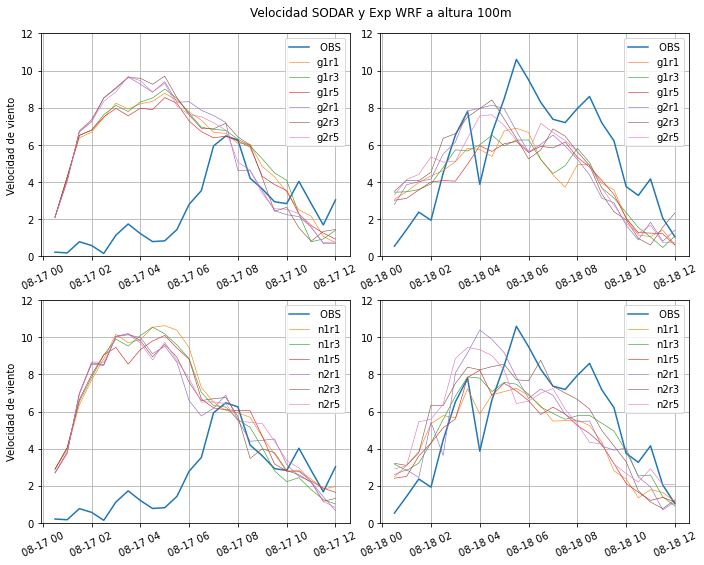

In [20]:
t1, t2, t3, t4 = 0, 24, 48, 72
panelPlot2gn(level=3)


36 40 46
2012-08-18 08:30:00
36 40 46
2012-08-18 08:30:00


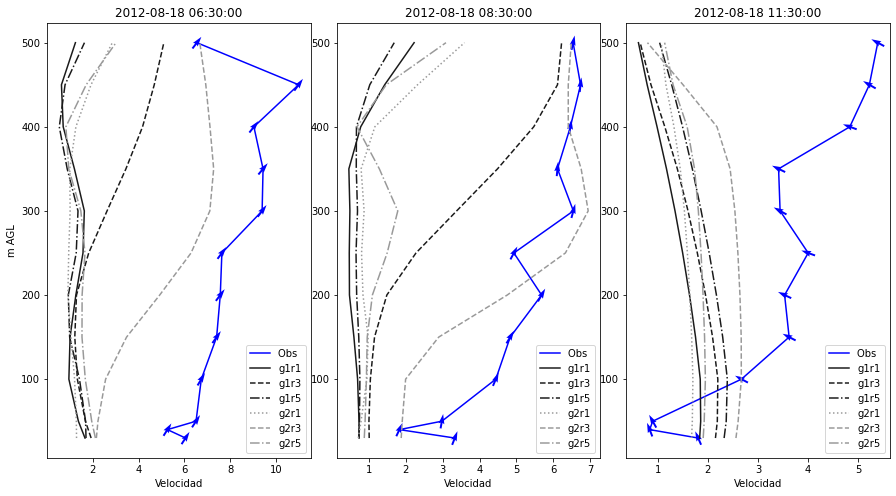

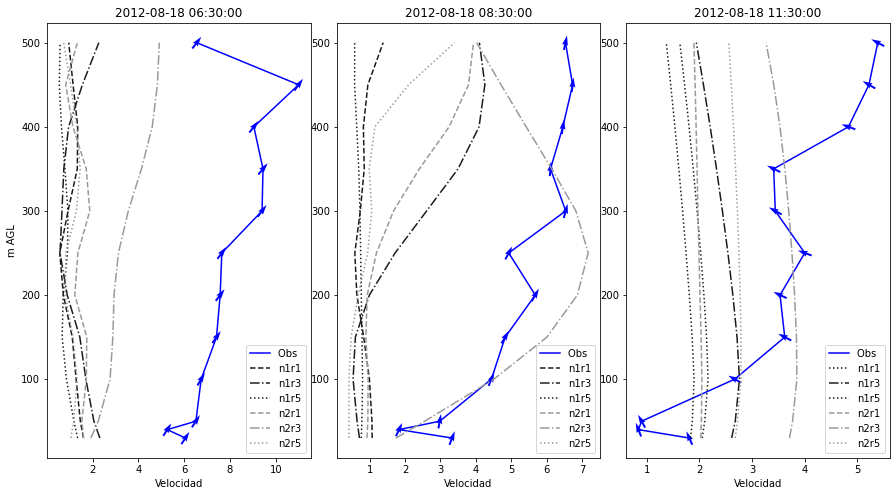

In [13]:
tt0, tt, tt2= 36, 40, 46
ProfilesPanel3g(tt0,tt,tt2)
print(xt[tt])

ProfilesPanel3n(tt0,tt,tt2)
print(xt[tt])

76 84 92
2012-08-19 06:30:00
76 84 92
2012-08-19 06:30:00


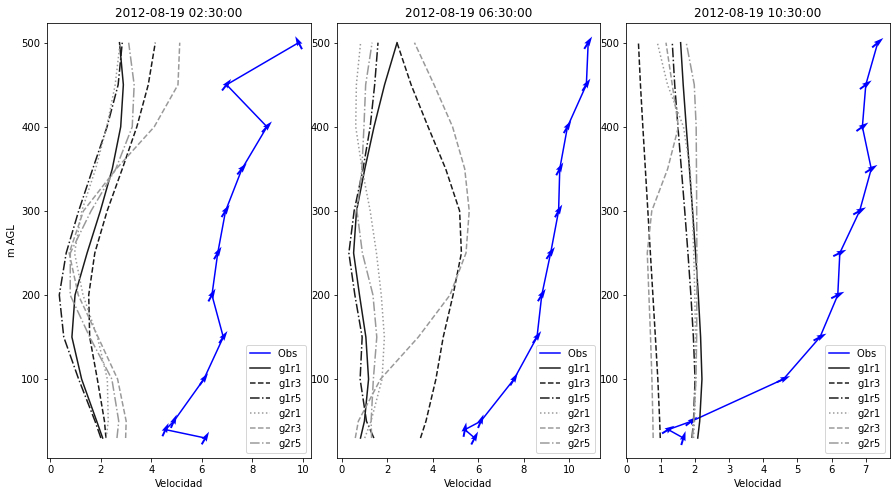

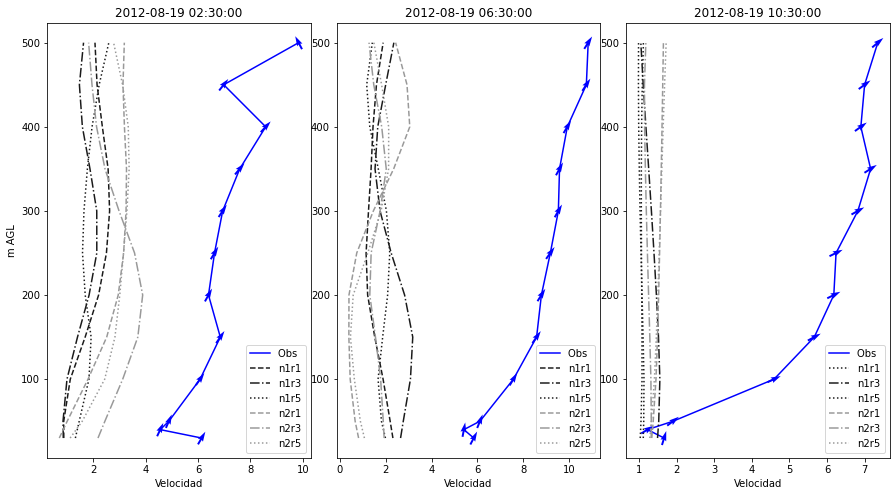

In [14]:
tt0, tt, tt2= 48+28, 48+36, 48+44
ProfilesPanel3g(tt0,tt,tt2)
print(xt[tt])

ProfilesPanel3n(tt0,tt,tt2)
print(xt[tt])

52 57 60
2012-08-18 17:00:00
52 57 60
2012-08-18 17:00:00


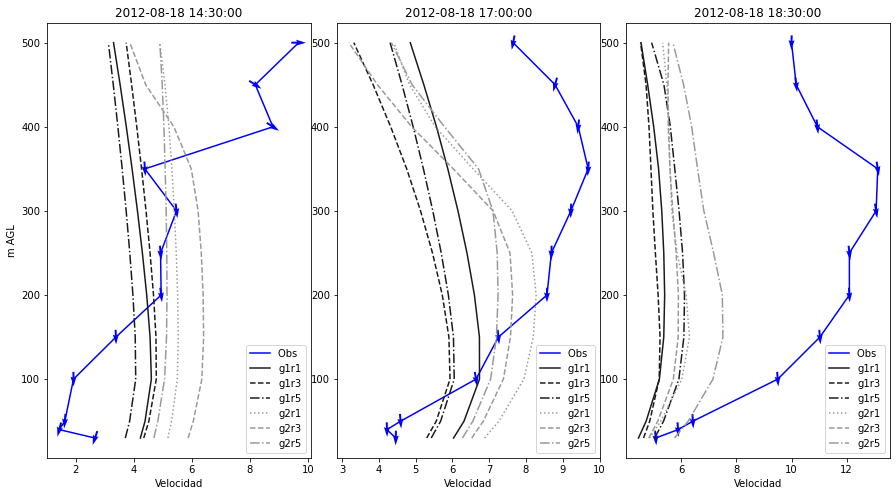

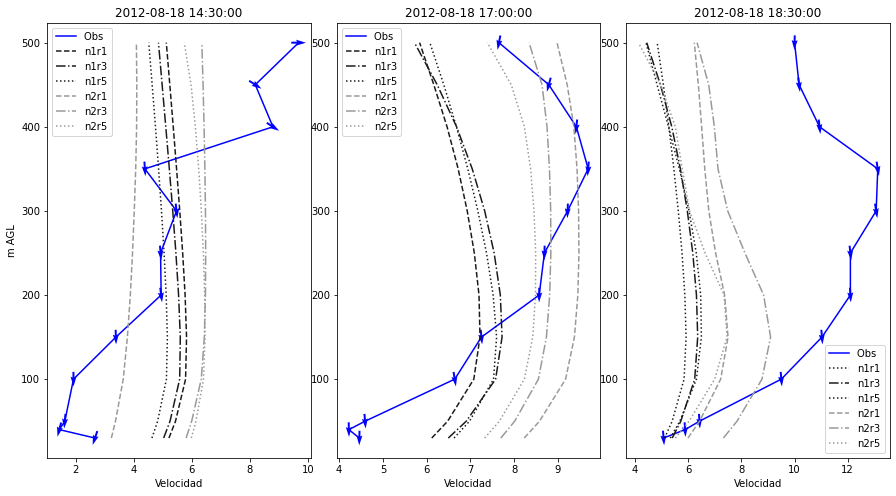

In [15]:
tt0, tt, tt2= 52, 57, 60
ProfilesPanel3g(tt0,tt,tt2)
print(xt[tt])

ProfilesPanel3n(tt0,tt,tt2)
print(xt[tt])

56 60 64
2012-08-18 18:30:00
56 60 64
2012-08-18 18:30:00


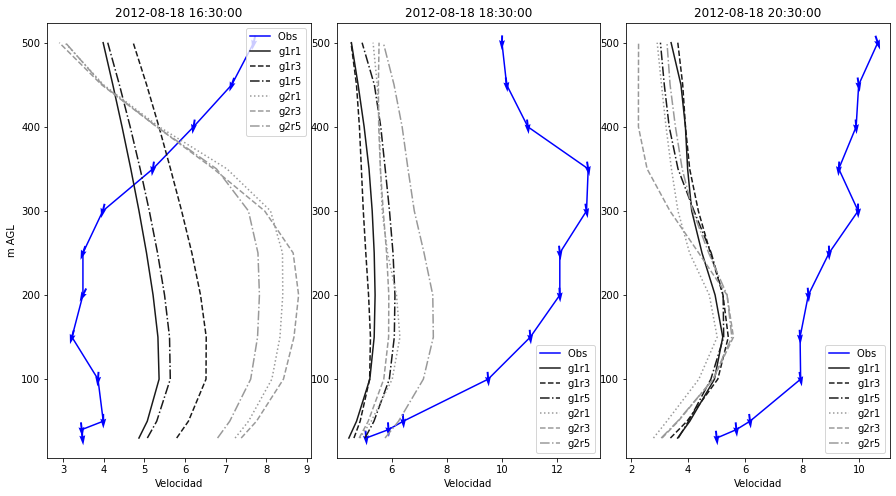

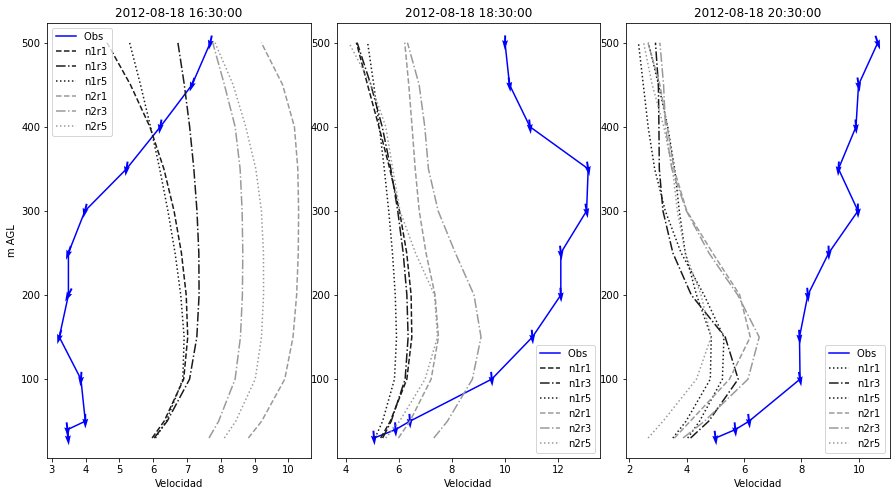

In [16]:
tt0, tt, tt2= 56, 60, 64
ProfilesPanel3g(tt0,tt,tt2)
print(xt[tt])

ProfilesPanel3n(tt0,tt,tt2)
print(xt[tt])